<a href="https://colab.research.google.com/github/SoniHarsh1/Dynamic-Allocation-Strategies-for-Multi-Agent-Target-Defense-Differential-Games/blob/main/Copy_of_1v3v3withAsgnmat_using_PuLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 24.6 MB/s eta 0:00:00
[[1 0 0]
 [0 1 0]
 [0 0 1]]
time - 0
Target Captured by Attacker 2
183


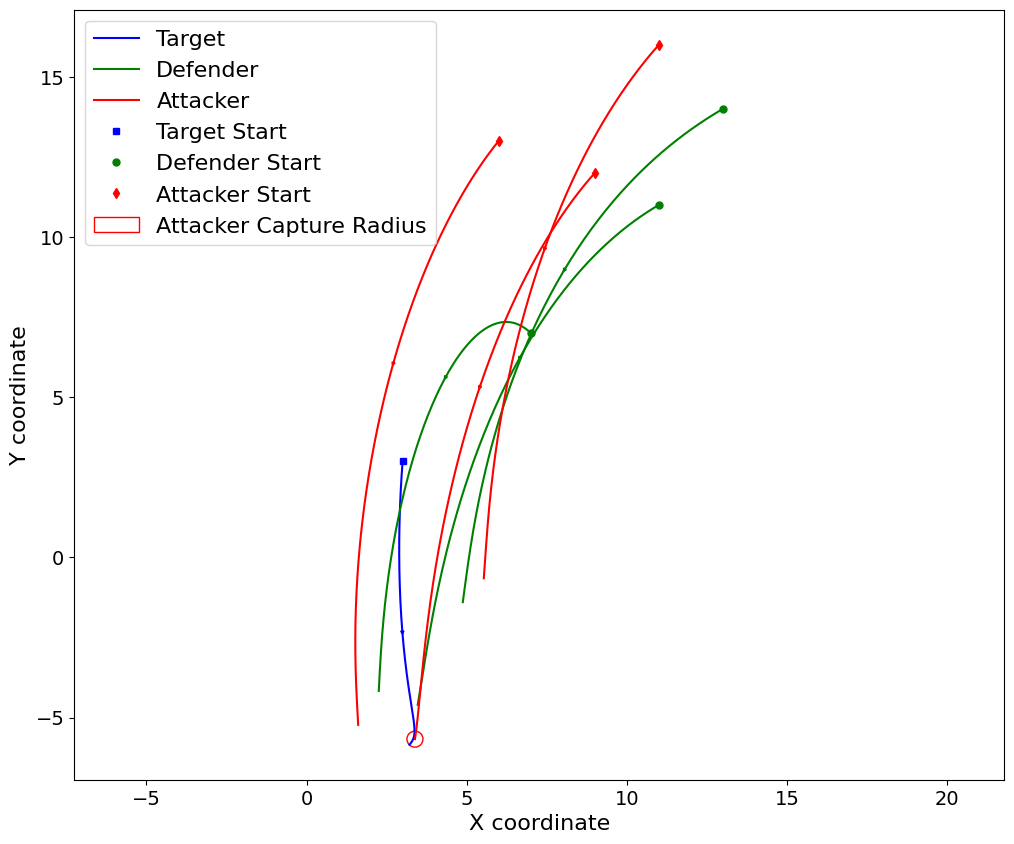

Game Over: Target captured by Attacker 2
Game duration: 0.37 time units


In [ ]:
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
from scipy.linalg import expm, inv
from scipy.optimize import linear_sum_assignment
!pip install pulp
from pulp import *

# Initial location of the players (1 target, 3 defenders, 3 attackers)
#X_0 = np.array([5, 5, 0, 10, 10, 10, 10, 5, 0, 0, 1, 0, 0, 1], dtype=float) #Target Captured
#X_0 = np.array([5, 5, 6, 5, 7, 5, 8, 5, 5, 8, 5, 9, 5, 10], dtype=float)
#X_0 = np.array([5, 5, 4, 6, 6, 6, 7, 6, 5, 9, 4, 8, 6, 9], dtype=float)
#X_0 = np.array([5, 5, 4, 4, 6, 4, 5, 7, 4, 7, 6, 8, 7, 6], dtype=float)
#X_0 = np.array([6, 6, 5, 5, 7, 5, 6, 8, 5, 8, 7, 9, 8, 7], dtype=float)
# X_0 = np.array([5, 3, 5, 5, 3, 1, 7, 1, 0, 10, 10, 10, 10, 0])
# X_0 = np.array([5, 2, 5, 2.5, 1.5, -1, 6.5, -1, 4, 10, 6, 10, 5, 10])
#X_0 = np.array([0, 0, 4, 0, 6, 0, 5, 1, 4, 10, 6, 10, 5, 10])     #All ATTACKERS CAPTURED!!!!!!!!!!!!!!!!!!!!!!!
# X_0 = np.array([6, 5, 7, 0, 3, 7, 7, 7, 0, 0, 4, 0, 5, 10])
# X_0 = np.array([5, 1, 1, 2, 2, 3, 4, 2, 1, 10, 2, 10, 4, 10])
# X_0 = np.array([1, 10, 1, 7, 2, 7, 3, 8, 1, 3, 4, 2, 5, 3])
#X_0 = np.array([1, 10, 1, 7, 3, 7, 5, 8, 2, 1, 6, 2, 12, 3])        #All ATTACKERS CAPTURED!!!!!!!!!!!!!!!!!!!!!!!
#X_0 = np.array([1, 10, 1, 5, 3, 5, 5, 5, 2, 1, 6, 2, 12, 3])
X_0 = np.array([3, 3, 7, 7, 11, 11, 13, 14, 6, 13, 9, 12, 11, 16])   #All Attackers Captured

#X_0 = np.array([5, 5, 3, 4, 7, 4, 5, 7, 3, 6, 7, 5, 6, 6])       #F1AAC
# X_0 = np.array([0, 0, 3, 0, 6, 0, 4, 2, 3, 4, 5, 4, 6, 5], dtype=float)     #F21ACTC
#X_0 = np.array([0, 0, 6, 0, 6, 6, 0, 6, 2, 10, 4, 12, 6, 10], dtype=float)    #F3AAC
#X_0 = np.array([0, 0, 8, 0, 8, 8, 0, 8, 2, 12, 10, 14, 12, 12], dtype=float)   #F41ACTC
#X_0 = np.array([0, 0, 1, 1, 3, 1, 1, 5, 4, 5, 6, 7, 2, 6], dtype=float)
#X_0 = np.array([0.0, 0.0, -2.0, 2.0, 2.0, 2.0, 0.0, 4.0, -4.0, -2.0, 4.0, -2.0, 0.0, 6.0], dtype=float)

# Initialization parameters
O_14 = np.zeros((14, 14))
O = np.zeros((2, 2))
I = np.eye(14)

B_t = np.vstack((np.eye(2), np.zeros((12, 2))))
B_d1 = np.vstack((np.zeros((2, 2)), np.eye(2), np.zeros((10, 2))))
B_d2 = np.vstack((np.zeros((4, 2)), np.eye(2), np.zeros((8, 2))))
B_d3 = np.vstack((np.zeros((6, 2)), np.eye(2), np.zeros((6, 2))))
B_a1 = np.vstack((np.zeros((8, 2)), np.eye(2), np.zeros((4, 2))))
B_a2 = np.vstack((np.zeros((10, 2)), np.eye(2), np.zeros((2, 2))))
B_a3 = np.vstack((np.zeros((12, 2)), np.eye(2)))

rt, rd1, rd2, rd3, ra1, ra2, ra3 = 30, 20, 20, 20, 20, 20, 20
R_t = rt * np.eye(2)
R_d1 = rd1 * np.eye(2)
R_d2 = rd2 * np.eye(2)
R_d3 = rd3 * np.eye(2)
R_a1 = ra1 * np.eye(2)
R_a2 = ra2 * np.eye(2)
R_a3 = ra3 * np.eye(2)

# Q_a1d1T = Q_a2d2T = Q_a3d3T = Q_a1d2T = Q_a1d3T = Q_a2d1T = Q_a2d3T = Q_a3d1T = Q_a3d2T = Q_a1tT = Q_a2tT = Q_a3tT = Q_d1tT = Q_d2tT = Q_d3tT = np.eye(2)

Q_a1d1T = Q_a2d2T = Q_a3d3T = Q_a1d2T = Q_a1d3T = Q_a2d1T = Q_a2d3T = Q_a3d1T = Q_a3d2T = Q_a3d3T =2*np.eye(2)
Q_a1d1T1 = Q_a2d2T1 = Q_a3d3T1 = Q_a1d2T1 = Q_a1d3T1 = Q_a2d1T1 = Q_a2d3T1 = Q_a3d1T1 = Q_a3d2T1 = Q_a3d3T1 = 0.5*np.eye(2)
Q_a1tT = Q_a2tT = Q_a3tT = 1.75*np.eye(2)
Q_d1tT = Q_d2tT = Q_d3tT = 1.25*np.eye(2)


S_t = B_t @ inv(R_t) @ B_t.T
S_d1 = B_d1 @ inv(R_d1) @ B_d1.T
S_d2 = B_d2 @ inv(R_d2) @ B_d2.T
S_d3 = B_d3 @ inv(R_d3) @ B_d3.T
S_a1 = B_a1 @ inv(R_a1) @ B_a1.T
S_a2 = B_a2 @ inv(R_a2) @ B_a2.T
S_a3 = B_a3 @ inv(R_a3) @ B_a3.T

# Initialize variables to store capture information
captured_by_attacker = False
all_attackers_captured = False
capturing_agent_index = None
captured_attackers = [False, False, False]

def euclidean_distance(pos1, pos2):
    return np.linalg.norm(np.array(pos1) - np.array(pos2))

# Get the assignment using PuLP
def get_assignment(defenders, attackers, captured_attackers):
    num_defenders = len(defenders)
    num_attackers = len(attackers)
    active_attackers = sum(1 for a in captured_attackers if not a)

    # Create the LP problem
    prob = LpProblem("Defender-Attacker_Assignment", LpMinimize)

    # Create decision variables only for non-captured attackers
    choices = LpVariable.dicts("Choice",
                               ((i, j) for i in range(num_defenders) for j in range(num_attackers) if not captured_attackers[j]),
                               cat='Binary')

    # Objective function
    prob += lpSum([euclidean_distance(defenders[i], attackers[j]) * choices[(i, j)]
                   for i in range(num_defenders) for j in range(num_attackers) if not captured_attackers[j]])

    # Constraints
    # Each active attacker is assigned to at most one defender
    for j in range(num_attackers):
        if not captured_attackers[j]:
            prob += lpSum([choices[(i, j)] for i in range(num_defenders)]) <= 1

    # Each defender is assigned to at most one attacker
    for i in range(num_defenders):
        prob += lpSum([choices[(i, j)] for j in range(num_attackers) if not captured_attackers[j]]) <= 1

    # Total assignments should be the minimum of active attackers and defenders
    prob += lpSum([choices[(i, j)] for i in range(num_defenders)
                   for j in range(num_attackers) if not captured_attackers[j]]) == min(num_defenders, active_attackers)

    # Solve the problem
    prob.solve()

    # Create the assignment matrix (maintaining original dimensions)
    assignment_matrix = np.zeros((num_defenders, num_attackers), dtype=int)
    for i in range(num_defenders):
        for j in range(num_attackers):
            if not captured_attackers[j] and (i, j) in choices:
                if choices[(i, j)].value() == 1:
                    assignment_matrix[i][j] = 1

    return assignment_matrix

# Step size and T selection
T = 0.02
tk = 0
step1 = 10
deltaT = T / step1
j = 0
sigmaa = 0.25
sigmad = 0.25
sigmat = 0
tflag = 0
time = [tk]
count = 0
X_t = []
a=1;    # lambda <----- Change it to vary the attacker's awareness towards defender

check = np.zeros((3, 3), dtype=int)

while tflag == 0:
    defenders = [X_0[2:4], X_0[4:6], X_0[6:8]]
    attackers = [X_0[8:10], X_0[10:12], X_0[12:14]]
    # Get the assignment matrix
    Asgn = get_assignment(defenders, attackers, captured_attackers)

    if (check != Asgn).any():
        print(Asgn)
        check = Asgn
        print("time -", time[-1])

    Q_t = np.block([
        [Q_d1tT+Q_d2tT+Q_d3tT-Q_a1tT-Q_a2tT-Q_a3tT, -Q_d1tT, -Q_d2tT, -Q_d3tT, Q_a1tT, Q_a2tT, Q_a3tT],
        [-Q_d1tT, Q_d1tT, O, O, O, O, O],
        [-Q_d2tT, O, Q_d2tT, O, O, O, O],
        [-Q_d3tT, O, O, Q_d3tT, O, O, O],
        [Q_a1tT, O, O, O, -Q_a1tT, O, O],
        [Q_a2tT, O, O, O, O, -Q_a2tT, O],
        [Q_a3tT, O, O, O, O, O, -Q_a3tT]
    ])

    Q_d1 = np.block([
        [Q_d1tT, -Q_d1tT, O, O, O, O, O],
        [-Q_d1tT, Q_d1tT+Asgn[0][0]*Q_a1d1T+Asgn[1][0]*Q_a2d1T+Asgn[2][0]*Q_a3d1T, O, O, -Asgn[0][0]*Q_a1d1T, -Asgn[1][0]*Q_a2d1T, -Asgn[2][0]*Q_a3d1T],
        [O, O, Asgn[0][1]*Q_a1d2T+Asgn[1][1]*Q_a2d2T+Asgn[2][1]*Q_a3d2T, O, -Asgn[0][1]*Q_a1d2T, -Asgn[1][1]*Q_a2d2T, -Asgn[2][1]*Q_a3d2T],
        [O, O, O, Asgn[0][2]*Q_a1d3T+Asgn[1][2]*Q_a2d3T+Asgn[2][2]*Q_a3d3T, -Asgn[0][2]*Q_a1d3T, -Asgn[1][2]*Q_a2d3T, -Asgn[2][2]*Q_a3d3T],
        [O, -Asgn[0][0]*Q_a1d1T, -Asgn[0][1]*Q_a1d2T, -Asgn[0][2]*Q_a1d3T, Asgn[0][0]*Q_a1d1T+Asgn[0][1]*Q_a1d2T+Asgn[0][2]*Q_a1d3T, O, O],
        [O, -Asgn[1][0]*Q_a2d1T, -Asgn[1][1]*Q_a2d2T, -Asgn[1][2]*Q_a2d3T, O, Asgn[1][0]*Q_a2d1T+Asgn[1][1]*Q_a2d2T+Asgn[1][2]*Q_a2d3T, O],
        [O, -Asgn[2][0]*Q_a3d1T, -Asgn[2][1]*Q_a3d2T, -Asgn[2][2]*Q_a3d3T, O, O, Asgn[2][0]*Q_a3d1T+Asgn[2][1]*Q_a3d2T+Asgn[2][2]*Q_a3d3T]
    ])

    Q_d2 = np.block([
        [Q_d2tT, O, -Q_d2tT, O, O, O, O],
        [O, Asgn[0][0]*Q_a1d1T+Asgn[1][0]*Q_a2d1T+Asgn[2][0]*Q_a3d1T, O, O, -Asgn[0][0]*Q_a1d1T, -Asgn[0][0]*Q_a2d1T, -Asgn[0][0]*Q_a3d1T],
        [-Q_d2tT, O, Q_d2tT+Asgn[0][1]*Q_a1d2T+Asgn[1][1]*Q_a2d2T+Asgn[2][1]*Q_a3d2T, O, -Asgn[0][1]*Q_a1d2T, -Asgn[1][1]*Q_a2d2T, -Asgn[2][1]*Q_a3d2T],
        [O, O, O, Asgn[0][2]*Q_a1d3T+Asgn[1][2]*Q_a2d3T+Asgn[2][2]*Q_a3d3T, -Asgn[0][2]*Q_a1d3T, -Asgn[1][2]*Q_a2d3T, -Asgn[2][2]*Q_a3d3T],
        [O, -Asgn[0][0]*Q_a1d1T, -Asgn[0][1]*Q_a1d2T, -Asgn[0][2]*Q_a1d3T, Asgn[0][0]*Q_a1d1T+Asgn[0][1]*Q_a1d2T+Asgn[0][2]*Q_a1d3T, O, O],
        [O, -Asgn[1][0]*Q_a2d1T, -Asgn[1][1]*Q_a2d2T, -Asgn[1][2]*Q_a2d3T, O, Asgn[1][0]*Q_a2d1T+Asgn[1][1]*Q_a2d2T+Asgn[1][2]*Q_a2d3T, O],
        [O, -Asgn[2][0]*Q_a3d1T, -Asgn[2][1]*Q_a3d2T, -Asgn[2][2]*Q_a3d3T, O, O, Asgn[2][0]*Q_a3d1T+Asgn[2][1]*Q_a3d2T+Asgn[2][2]*Q_a3d3T]
    ])

    Q_d3 = np.block([
        [Q_d3tT, O, O, -Q_d3tT, O, O, O],
        [O, Asgn[0][0]*Q_a1d1T+Asgn[1][0]*Q_a2d1T+Asgn[2][0]*Q_a3d1T, O, O, -Asgn[0][0]*Q_a1d1T, -Asgn[0][0]*Q_a2d1T, -Asgn[0][0]*Q_a3d1T],
        [O, O, Asgn[0][1]*Q_a1d2T+Asgn[1][1]*Q_a2d2T+Asgn[2][1]*Q_a3d2T, O, -Asgn[0][1]*Q_a1d2T, -Asgn[1][1]*Q_a2d2T, -Asgn[2][1]*Q_a3d2T],
        [-Q_d3tT, O, O, Q_d3tT+Asgn[0][2]*Q_a1d3T+Asgn[1][2]*Q_a2d3T+Asgn[2][2]*Q_a3d3T, -Asgn[0][2]*Q_a1d3T, -Asgn[1][2]*Q_a2d3T, -Asgn[2][2]*Q_a3d3T],
        [O, -Asgn[0][0]*Q_a1d1T, -Asgn[0][1]*Q_a1d2T, -Asgn[0][2]*Q_a1d3T, Asgn[0][0]*Q_a1d1T+Asgn[0][1]*Q_a1d2T+Asgn[0][2]*Q_a1d3T, O, O],
        [O, -Asgn[1][0]*Q_a2d1T, -Asgn[1][1]*Q_a2d2T, -Asgn[1][2]*Q_a2d3T, O, Asgn[1][0]*Q_a2d1T+Asgn[1][1]*Q_a2d2T+Asgn[1][2]*Q_a2d3T, O],
        [O, -Asgn[2][0]*Q_a3d1T, -Asgn[2][1]*Q_a3d2T, -Asgn[2][2]*Q_a3d3T, O, O, Asgn[2][0]*Q_a3d1T+Asgn[2][1]*Q_a3d2T+Asgn[2][2]*Q_a3d3T]
    ])

    Q_a1 = np.block([
      [Q_a1tT, O, O, O, -Q_a1tT, O, O],
      [O, -a*Q_a1d1T1, O, O, a*Q_a1d1T1, O, O],
      [O, O, -a*Q_a1d2T1, O, a*Q_a1d2T1, O, O],
      [O, O, O, -a*Q_a1d3T1, a*Q_a1d3T1, O, O],
      [-Q_a1tT, a*Q_a1d1T1, a*Q_a1d2T1, a*Q_a1d3T1, Q_a1tT-a*(Q_a1d1T1+Q_a1d2T1+Q_a1d3T1), O, O],
      [O, O, O, O, O, O, O],
      [O, O, O, O, O, O, O]
    ])

    Q_a2 = np.block([
        [Q_a2tT, O, O, O, O, -Q_a2tT, O],
        [O, -a*Q_a2d1T1, O, O, O, a*Q_a2d1T1, O],
        [O, O, -a*Q_a2d2T1, O, O, a*Q_a2d2T1, O],
        [O, O, O, -a*Q_a2d3T1, O, a*Q_a2d3T1, O],
        [O, O, O, O, O, O, O],
        [-Q_a2tT, a*Q_a2d1T1, a*Q_a2d2T1, a*Q_a2d3T1, O, Q_a2tT-a*(Q_a2d1T1+Q_a2d2T1+Q_a2d3T1), O],
        [O, O, O, O, O, O, O]
    ])

    Q_a3 = np.block([
        [Q_a3tT, O, O, O, O, O, -Q_a3tT],
        [O, -a*Q_a3d1T1, O, O, O, O, a*Q_a3d1T1],
        [O, O, -a*Q_a3d2T1, O, O, O, a*Q_a3d2T1],
        [O, O, O, -a*Q_a3d3T1, O, O, a*Q_a3d3T1],
        [O, O, O, O, O, O, O],
        [O, O, O, O, O, O, O],
        [-Q_a3tT, a*Q_a3d1T1, a*Q_a3d2T1, a*Q_a3d3T1, O, O, Q_a3tT-a*(Q_a3d1T1+Q_a3d2T1+Q_a3d3T1)]
    ])

    M = np.block([
        [O_14, -S_t, -S_d1, -S_d2, -S_d3, -S_a1, -S_a2, -S_a3],
        [-Q_a1, O_14, O_14, O_14, O_14, O_14, O_14, O_14],
        [-Q_a2, O_14, O_14, O_14, O_14, O_14, O_14, O_14],
        [-Q_a3, O_14, O_14, O_14, O_14, O_14, O_14, O_14],
        [-Q_d1, O_14, O_14, O_14, O_14, O_14, O_14, O_14],
        [-Q_d2, O_14, O_14, O_14, O_14, O_14, O_14, O_14],
        [-Q_d3, O_14, O_14, O_14, O_14, O_14, O_14, O_14],
        [-Q_t, O_14, O_14, O_14, O_14, O_14, O_14, O_14]
    ])

    #print(M)

    Q = np.vstack((I, Q_t, Q_d1, Q_d2, Q_d3, Q_a1, Q_a2, Q_a3))
    H_T = np.hstack((I, O_14, O_14, O_14, O_14, O_14, O_14, O_14)) @ expm(-M * (tk + T)) @ Q
    Y = expm(-M * T) @ Q @ inv(H_T) @ X_0

    # Update positions only for active agents
    new_X_0 = X_0.copy().astype(float)
    new_X_0[:8] = Y[:8]  # Update target and defenders
    for i in range(3):
        if not captured_attackers[i]:
            new_X_0[8+2*i:10+2*i] = Y[8+2*i:10+2*i]  # Update active attackers
    X_0 = new_X_0

    X_t.append(X_0)

    # Check for captures
    for i in range(3):
        if np.linalg.norm(Y[:2] - Y[8+2*i:10+2*i]) <= sigmaa and not captured_attackers[i]:
            print(f'Target Captured by Attacker {i+1}')
            captured_by_attacker = True
            capturing_agent_index = i
            tflag = 1
            break

    if not captured_by_attacker:
        for i in range(3):
            for j in range(3):
                if np.linalg.norm(Y[2+2*i:4+2*i] - Y[8+2*j:10+2*j]) <= sigmad and not captured_attackers[j]:
                    print(f'Attacker {j+1} Captured by Defender {i+1}')
                    captured_attackers[j] = True
                    capturing_agent_index = i
                    break
            if all(captured_attackers):
                all_attackers_captured = True
                tflag = 1
                break
    j += 1
    tk += deltaT
    count += 1
    time.append(tk)

X_t = np.array(X_t).T

print(count)

# Plotting
plt.figure(figsize=(12, 10))
plt.plot(X_t[0], X_t[1], color='b', linewidth=1.5, label='Target')
for i in range(3):
    color = 'g' if i == 0 else 'g'
    label = 'Defender' if i == 0 else None
    plt.plot(X_t[2+2*i], X_t[3+2*i], color=color, linewidth=1.5, label=label)
for i in range(3):
    color = 'r' if i == 0 else 'r'
    label = 'Attacker' if i == 0 else None
    plt.plot(X_t[8+2*i], X_t[9+2*i], color=color, linewidth=1.5, label=label)

# Add markers to the initial positions
plt.plot(X_t[0, 0], X_t[1, 0], 's', markersize=5, linewidth=4, color='b', label='Target Start')
for i in range(3):
    label = 'Defender Start' if i == 0 else None
    plt.plot(X_t[2+2*i, 0], X_t[3+2*i, 0], '.', markersize=10, linewidth=4, color='g', label=label)
for i in range(3):
    label = 'Attacker Start' if i == 0 else None
    plt.plot(X_t[8+2*i, 0], X_t[9+2*i, 0], 'd', markersize=5, linewidth=4, color='r', label=label)

# Add arrows to show direction of movement
mid_point = len(X_t[0]) // 2
arrow_length = 0.1
arrow_width = 0.1

def add_arrow(x, y, dx, dy, color):
    plt.arrow(x, y, dx, dy, head_width=arrow_width, head_length=arrow_length,
              fc=color, ec=color, length_includes_head=True)

# Add arrows for all agents
for i in range(7):  # 0: target, 1-3: defenders, 4-6: attackers
    color = 'blue' if i == 0 else ('green' if i <= 3 else 'red')
    add_arrow(X_t[2*i, mid_point], X_t[2*i+1, mid_point],
              X_t[2*i, mid_point+1] - X_t[2*i, mid_point],
              X_t[2*i+1, mid_point+1] - X_t[2*i+1, mid_point], color)

# Add capture zones
if captured_by_attacker:
    circle = plt.Circle((X_t[8+2*capturing_agent_index, -1], X_t[9+2*capturing_agent_index, -1]),
                        sigmaa, fill=False, edgecolor='r', label='Attacker Capture Radius')
    plt.gca().add_artist(circle)
if any(captured_attackers):
    capture_radius_added = False
    for i in range(3):  # For each defender
        for j in range(3):  # For each attacker
            if captured_attackers[j]:
                # Find the time step where the capture occurred
                capture_step = next((step for step in range(len(X_t[0]))
                                     if np.linalg.norm(X_t[2+2*i:4+2*i, step] - X_t[8+2*j:10+2*j, step]) <= sigmad), None)
                if capture_step is not None:
                    circle = plt.Circle((X_t[2+2*i, capture_step], X_t[3+2*i, capture_step]),
                                        sigmad, fill=False, edgecolor='g',
                                        label='Defender Capture Radius' if not capture_radius_added else "")
                    plt.gca().add_artist(circle)
                    capture_radius_added = True

plt.axis('equal')
plt.legend(fontsize="16")
plt.xlabel('X coordinate', fontsize="16")
plt.ylabel('Y coordinate', fontsize="16")
plt.tick_params(axis='both', which='major', labelsize="14")

plt.savefig("1v3v3pdf.pdf", format='pdf', bbox_inches='tight')
plt.show()

# Print game result
if captured_by_attacker:
    print(f"Game Over: Target captured by Attacker {capturing_agent_index + 1}")
elif all_attackers_captured:
    print("Game Over: All Attackers captured by Defenders")
else:
    print("Game ended without capture")

print(f"Game duration: {time[-1]:.2f} time units")